In [ ]:
from hestonpy.models.heston import Heston
from hestonpy.models.bates import Bates
from hestonpy.models.calibration.volatilitySmile import VolatilitySmile

r = 0.00

Get market data

In [2]:
from hestonpy.option.data import get_options_data, filter_data_for_maturity

all_market_data, spot, maturities = get_options_data(symbol='^SPX')
maturities, spot

(('2025-03-31',
  '2025-04-01',
  '2025-04-02',
  '2025-04-03',
  '2025-04-04',
  '2025-04-07',
  '2025-04-08',
  '2025-04-09',
  '2025-04-10',
  '2025-04-11',
  '2025-04-14',
  '2025-04-15',
  '2025-04-16',
  '2025-04-17',
  '2025-04-21',
  '2025-04-22',
  '2025-04-23',
  '2025-04-24',
  '2025-04-25',
  '2025-04-28',
  '2025-04-29',
  '2025-04-30',
  '2025-05-01',
  '2025-05-02',
  '2025-05-05',
  '2025-05-06',
  '2025-05-08',
  '2025-05-09',
  '2025-05-16',
  '2025-05-30',
  '2025-06-20',
  '2025-06-30',
  '2025-07-18',
  '2025-07-31',
  '2025-08-15',
  '2025-08-29',
  '2025-09-19',
  '2025-09-30',
  '2025-10-17',
  '2025-11-21',
  '2025-12-19',
  '2025-12-31',
  '2026-01-16',
  '2026-02-20',
  '2026-03-20',
  '2026-03-31',
  '2026-04-17',
  '2026-06-18',
  '2026-12-18',
  '2027-12-17',
  '2028-12-15',
  '2029-12-21',
  '2030-12-20'),
 np.float64(5580.93994140625))

In [3]:
maturity = maturities[7]
full_market_data = filter_data_for_maturity(all_market_data, maturity)
full_market_data

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity
0,820.14,657.5,675.60,0.000010,4900.0,1.0,0.027778,2025-04-09
1,506.75,270.4,288.60,0.214546,5300.0,1.0,0.027778,2025-04-09
2,297.18,218.1,236.30,0.218949,5360.0,1.0,0.027778,2025-04-09
3,188.04,135.3,136.50,0.197213,5480.0,1.0,0.027778,2025-04-09
4,243.30,121.9,123.10,0.197678,5500.0,2.0,0.027778,2025-04-09
...,...,...,...,...,...,...,...,...
85,0.15,0.0,0.25,0.209481,6150.0,106.0,0.027778,2025-04-09
86,0.20,0.0,0.20,0.220101,6200.0,1.0,0.027778,2025-04-09
87,0.08,0.0,0.20,0.250007,6300.0,1.0,0.027778,2025-04-09
88,0.08,0.0,0.20,0.278816,6400.0,2.0,0.027778,2025-04-09


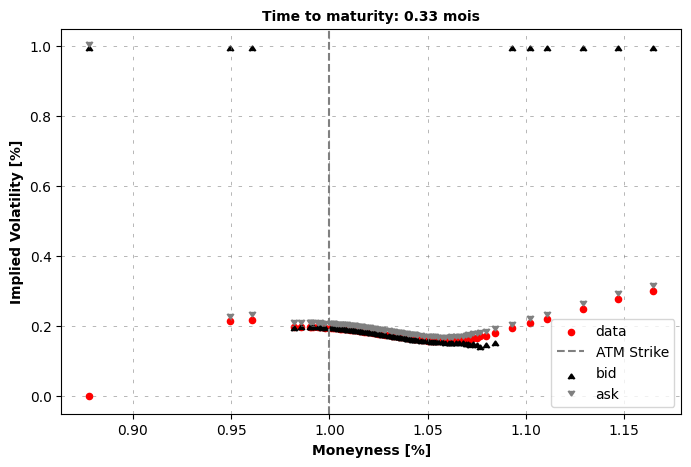

In [4]:
time_to_maturity = full_market_data['Time to Maturity'].iloc[0]
strikes = full_market_data['Strike'].values
bid_prices = full_market_data["Bid"].values
ask_prices = full_market_data['Ask'].values
market_ivs = full_market_data['Implied Volatility'].values
market_prices = full_market_data['Call Price'].values

marketVolatilitySmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_ivs=market_ivs,
    r=r
)
marketVolatilitySmile.plot(bid_prices=bid_prices, ask_prices=ask_prices)

filter market data

la iv du marché fait pas trop de sens, plutot utiliser $$\frac{\sigma_{bid}+\sigma_{ask}}{2}$$

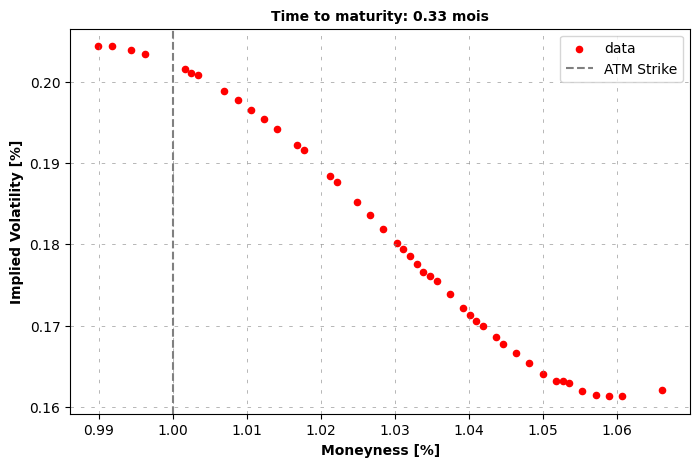

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity,Mid ivs,Ask ivs,Bid ivs,Mid Price
5,119.75,106.10,107.30,0.197812,5525.0,18.0,0.027778,2025-04-09,0.204371,0.206068,0.202673,106.700
7,109.77,100.10,101.30,0.197777,5535.0,34.0,0.027778,2025-04-09,0.204358,0.206030,0.202686,100.700
8,102.21,91.60,92.30,0.196713,5550.0,192.0,0.027778,2025-04-09,0.203963,0.204921,0.203004,91.950
10,94.59,85.70,86.80,0.196648,5560.0,21.0,0.027778,2025-04-09,0.203360,0.204855,0.201865,86.250
13,81.38,69.80,71.00,0.195019,5590.0,15.0,0.027778,2025-04-09,0.201535,0.203153,0.199918,70.400
14,77.20,67.30,68.50,0.194619,5595.0,13.0,0.027778,2025-04-09,0.201114,0.202734,0.199495,67.900
15,74.13,65.20,65.80,0.193558,5600.0,83.0,0.027778,2025-04-09,0.200818,0.201629,0.200007,65.500
19,62.53,55.60,56.70,0.192345,5620.0,15.0,0.027778,2025-04-09,0.198857,0.200367,0.197347,56.150
21,56.23,51.20,52.30,0.191292,5630.0,36.0,0.027778,2025-04-09,0.197741,0.199270,0.196212,51.750
23,99.17,47.00,48.10,0.190197,5640.0,12.0,0.027778,2025-04-09,0.196574,0.198126,0.195023,47.550


In [5]:
market_data = marketVolatilitySmile.filters(full_market_data)
marketVolatilitySmile.plot()
market_data

# Calibration with an Heston model

Calibrated parameters: v0=0.041 | kappa=1.253 | theta=0.083 | sigma=0.514 | rho=-1.000

at minimum 0.142027 accepted 1
Parameters: kappa=1.253 | theta=0.083 | sigma=0.514 | rho=-1.000 

at minimum 0.141561 accepted 1
Parameters: kappa=0.029 | theta=1.856 | sigma=0.508 | rho=-1.000 

at minimum 0.141567 accepted 1
Parameters: kappa=0.045 | theta=1.189 | sigma=0.508 | rho=-1.000 

at minimum 0.141564 accepted 1
Parameters: kappa=0.036 | theta=1.481 | sigma=0.508 | rho=-1.000 

at minimum 0.141561 accepted 1
Parameters: kappa=0.030 | theta=1.742 | sigma=0.508 | rho=-1.000 

at minimum 0.141562 accepted 1
Parameters: kappa=0.032 | theta=1.655 | sigma=0.508 | rho=-1.000 

at minimum 0.141564 accepted 1
Parameters: kappa=0.038 | theta=1.416 | sigma=0.508 | rho=-1.000 

['success condition satisfied'] True
Calibrated parameters: v0=0.041 | kappa=0.029 | theta=1.856 | sigma=0.508 | rho=-1.000



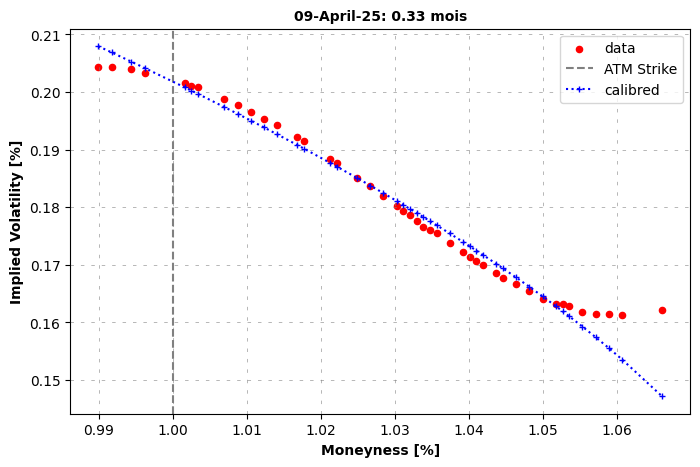

{'vol_initial': np.float64(0.04061648109278204),
 'kappa': np.float64(0.028553188117173153),
 'theta': np.float64(1.8562394988036592),
 'sigma': np.float64(0.5081268884807789),
 'rho': np.float64(-1.0),
 'drift_emm': 0}

In [6]:
params = {
    "kappa": 1.25,
    "theta": 0.06,
    "sigma": 0.6,
    "rho": -0.8,
}
heston = Heston(spot=spot, vol_initial=0.06, r=r, drift_emm=0, **params)

initial_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=list(params.values()),
    speed='local',
)

initial_guess = [initial_params['kappa'], initial_params['theta'], initial_params['sigma'], initial_params['rho']]
calibrated_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=initial_guess,
    power='mse',
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params),
    maturity=maturity
)
calibrated_params

# Calibration with a Baites model

Calibrated parameters:
 v0=0.041 | kappa=1.211 | theta=0.753 | sigma=1.329 | rho=-0.805  | lambda_jump=3.189  | mu_J=-0.491  | sigma_J=0.052

at minimum 0.002224 accepted 1
Parameters: kappa=1.211 | theta=0.753 | sigma=1.329 | rho=-0.805  | lambda_jump=3.189  | mu_J=-0.491  | sigma_J=0.050 

at minimum 0.002204 accepted 1
Parameters: kappa=0.701 | theta=1.260 | sigma=1.319 | rho=-0.805  | lambda_jump=3.180  | mu_J=-0.496  | sigma_J=0.050 

at minimum 0.000720 accepted 1
Parameters: kappa=0.489 | theta=1.465 | sigma=1.158 | rho=-0.846  | lambda_jump=3.150  | mu_J=-0.227  | sigma_J=0.125 

at minimum 0.000742 accepted 1
Parameters: kappa=0.628 | theta=1.168 | sigma=1.165 | rho=-0.843  | lambda_jump=3.013  | mu_J=-0.443  | sigma_J=0.207 

at minimum 0.000618 accepted 1
Parameters: kappa=0.692 | theta=1.073 | sigma=1.186 | rho=-0.855  | lambda_jump=4.495  | mu_J=-0.057  | sigma_J=0.050 

at minimum 0.000746 accepted 1
Parameters: kappa=0.921 | theta=0.815 | sigma=1.170 | rho=-0.843  | lamb

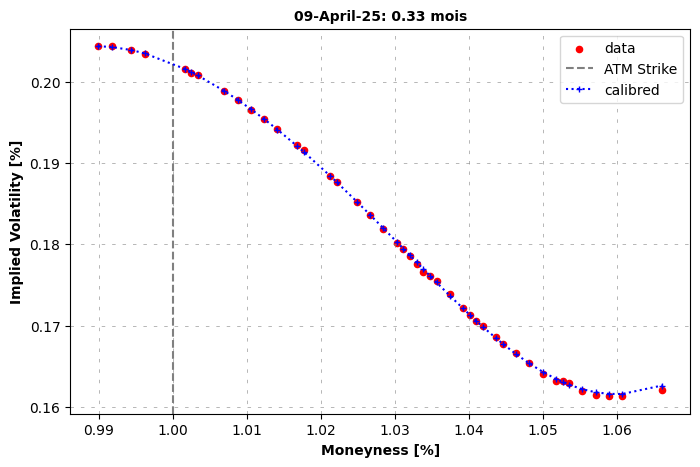

{'vol_initial': np.float64(0.04061648109278204),
 'kappa': np.float64(0.6923585666487466),
 'theta': np.float64(1.0728827988086265),
 'drift_emm': 0,
 'sigma': np.float64(1.1861044273587131),
 'rho': np.float64(-0.8549556775813509),
 'lambda_jump': np.float64(4.495056249998712),
 'mu_J': np.float64(-0.05650398032298261),
 'sigma_J': np.float64(0.05000126603766209)}

In [7]:
params = {
    "kappa": 1.25,
    "theta": 0.06,
    "sigma": 0.6,
    "rho": -0.5,
    "lambda_jump": 1.0,
    "mu_J": -0.1,
    'sigma_J': 0.3
}
bates = Bates(spot=spot, vol_initial=0.06, r=r, drift_emm=0, **params)

initial_params = marketVolatilitySmile.calibration(
    price_function=bates.call_price,
    guess_correlation_sign='negative',
    initial_guess=list(params.values()),
    power='mse',
    speed='local',
)

initial_guess = [initial_params['kappa'], initial_params['theta'], initial_params['sigma'], initial_params['rho'], 
                 initial_params['lambda_jump'], initial_params['mu_J'], initial_params['sigma_J']]
calibrated_params = marketVolatilitySmile.calibration(
    price_function=bates.call_price,
    guess_correlation_sign='negative',
    initial_guess=initial_guess,
    power='mse',
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=bates.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params),
    maturity=maturity
)
calibrated_params